In [74]:
# Import important libreris.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [75]:
# Load the data 
ev_sales_data=pd.read_csv("C:\\Users\\Admin\\Desktop\\unified\\Proj 1\\Electric Vehicle Sales by State in India.csv")


In [76]:
# Show first five rows
ev_sales_data.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0


In [77]:
# Check datatypes.
ev_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               96845 non-null  float64
 1   Month_Name         96845 non-null  object 
 2   Date               96845 non-null  object 
 3   State              96845 non-null  object 
 4   Vehicle_Class      96845 non-null  object 
 5   Vehicle_Category   96845 non-null  object 
 6   Vehicle_Type       96845 non-null  object 
 7   EV_Sales_Quantity  96845 non-null  float64
dtypes: float64(2), object(6)
memory usage: 5.9+ MB


In [78]:
# Convert year column float to datetime
ev_sales_data["Year"]=ev_sales_data["Year"].astype(int)

In [79]:
#Convert date column object to datetime
ev_sales_data["Date"]=pd.to_datetime(ev_sales_data["Date"])

In [80]:
# Check info agin
ev_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Year               96845 non-null  int64         
 1   Month_Name         96845 non-null  object        
 2   Date               96845 non-null  datetime64[ns]
 3   State              96845 non-null  object        
 4   Vehicle_Class      96845 non-null  object        
 5   Vehicle_Category   96845 non-null  object        
 6   Vehicle_Type       96845 non-null  object        
 7   EV_Sales_Quantity  96845 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 5.9+ MB


In [81]:
# Checking for null values
ev_sales_data.isnull().sum()

Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64

In [82]:
# Step 1: yearly EV sales
yearly_sales=ev_sales_data.groupby("Year")["EV_Sales_Quantity"].sum().reset_index()
yearly_sales

,Year,EV_Sales_Quantity
0,2014,2392.0
1,2015,7805.0
2,2016,49855.0
3,2017,87420.0
4,2018,130254.0
5,2019,166819.0
6,2020,124684.0
7,2021,331498.0
8,2022,1024723.0
9,2023,1525179.0


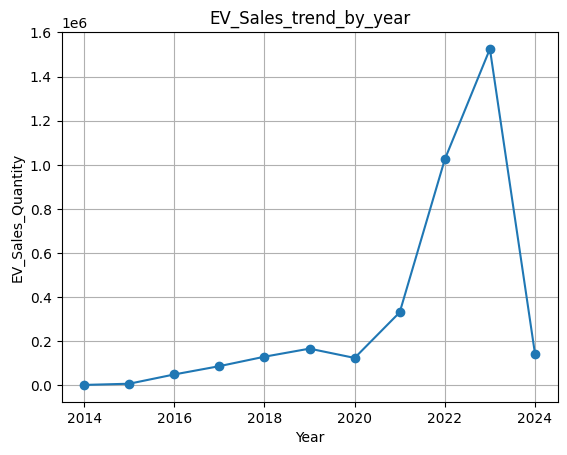

In [83]:
# Step 2: line Chart For Yearly EV Sales
plt.plot(yearly_sales["Year"],yearly_sales["EV_Sales_Quantity"], marker="o")
plt.title("EV_Sales_trend_by_year")
plt.xlabel("Year")
plt.ylabel("EV_Sales_Quantity")
plt.grid(True)
plt.show()

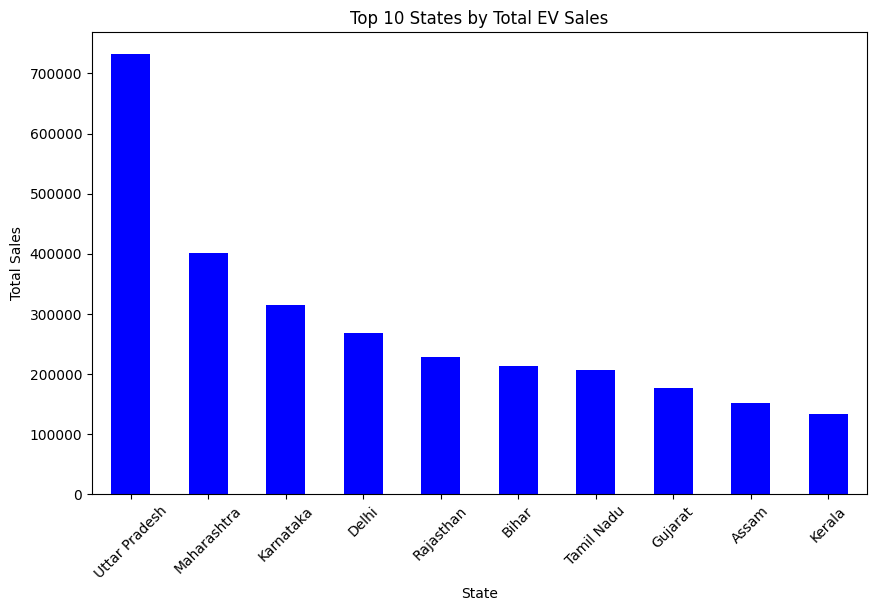

In [84]:
# Step 3:State Wise EV sales
top_states =ev_sales_data.groupby("State")["EV_Sales_Quantity"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
top_states.plot(kind="bar",color="b")
plt.title("Top 10 States by Total EV Sales")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

In [85]:
print(top_states)

State
Uttar Pradesh    732074.0
Maharashtra      401535.0
Karnataka        315498.0
Delhi            268538.0
Rajasthan        228573.0
Bihar            213465.0
Tamil Nadu       206902.0
Gujarat          176713.0
Assam            151917.0
Kerala           133246.0
Name: EV_Sales_Quantity, dtype: float64


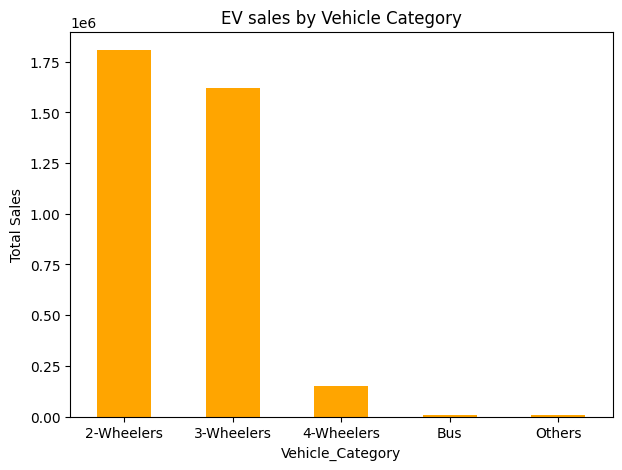

In [86]:
# Step 4:  Vehicle Category Sale
category_sales=ev_sales_data.groupby("Vehicle_Category")["EV_Sales_Quantity"].sum()
plt.figure(figsize=(7,5))
category_sales.plot(kind="bar",color="orange")
plt.title("EV sales by Vehicle Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=0)
plt.show()

In [87]:
category_sales

Vehicle_Category
2-Wheelers    1808105.0
3-Wheelers    1620310.0
4-Wheelers     149775.0
Bus              7009.0
Others           8612.0
Name: EV_Sales_Quantity, dtype: float64

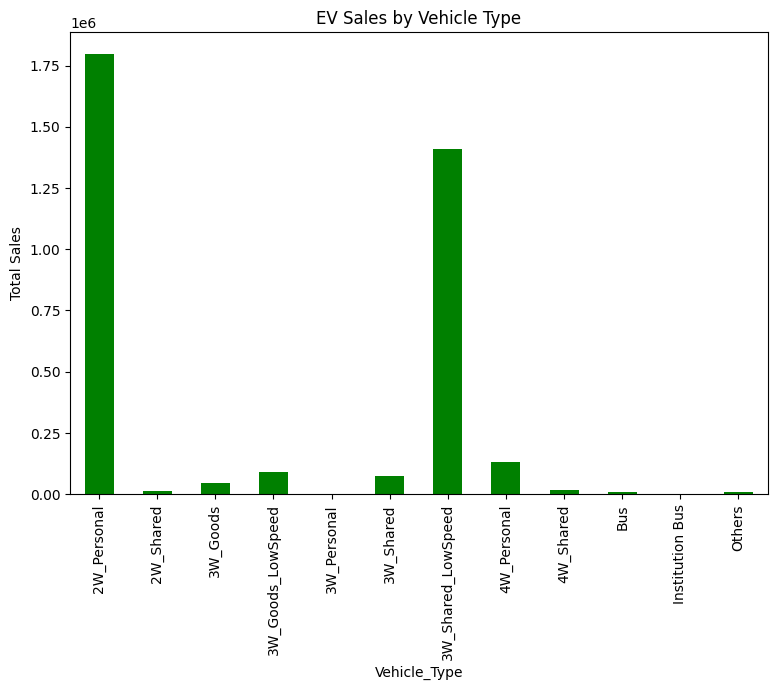

In [88]:
# Step 5: Vehicle Type Sales
vehicle_type_sales=ev_sales_data.groupby("Vehicle_Type")["EV_Sales_Quantity"].sum()
plt.figure(figsize=(9,6))
vehicle_type_sales.plot(kind="bar",color="green")
plt.title("EV Sales by Vehicle Type")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.show()


In [89]:
vehicle_type_sales

Vehicle_Type
2W_Personal           1796340.0
2W_Shared               11765.0
3W_Goods                44974.0
3W_Goods_LowSpeed       90656.0
3W_Personal               421.0
3W_Shared               76132.0
3W_Shared_LowSpeed    1408127.0
4W_Personal            130676.0
4W_Shared               19099.0
Bus                      7009.0
Institution Bus             0.0
Others                   8612.0
Name: EV_Sales_Quantity, dtype: float64

In [90]:
# Step 6:Forcasting Year Sales
recent_years=yearly_sales[yearly_sales["Year"]>=2018].copy()
recent_years["growth"]=recent_years["EV_Sales_Quantity"].diff()
avg_growth=recent_years["growth"].mean()
last_year=recent_years["Year"].max()
last_sales=recent_years[recent_years["Year"]==last_year]["EV_Sales_Quantity"].values[0]

In [91]:
forcast=[]
for i in range(1,4):
    year=last_year + i
    forcasted_sales = last_sales + avg_growth * i
    forcast.append((year,int(forcasted_sales)))
forcast_df=pd.DataFrame(forcast,columns=["Year","Forcasted_sales"])
print(forcast_df)

   Year  Forcasted_sales
0  2025           145336
1  2026           147491
2  2027           149646


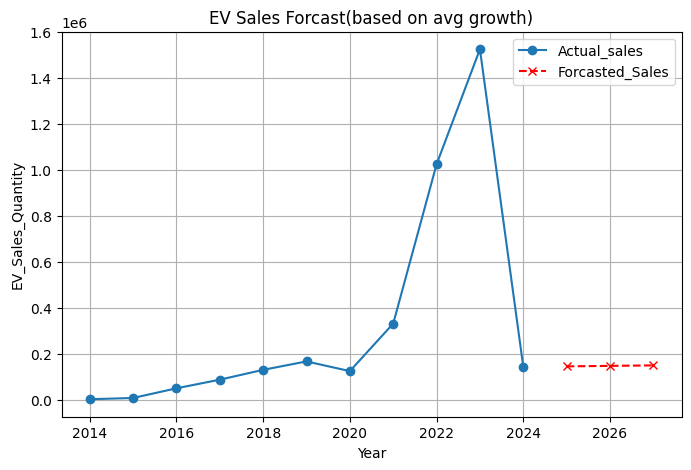

In [92]:
# Step 7: Actual = Forcasted Sales
plt.figure(figsize=(8,5))
plt.plot(yearly_sales["Year"],yearly_sales["EV_Sales_Quantity"],marker='o',label="Actual_sales")
plt.plot(forcast_df["Year"],forcast_df["Forcasted_sales"],marker='x',linestyle="--",color="red",label="Forcasted_Sales")
plt.title("EV Sales Forcast(based on avg growth)")
plt.xlabel("Year")
plt.ylabel("EV_Sales_Quantity")
plt.legend()
plt.grid(True)
plt.show()